In [114]:
import tensorflow as tf

In [115]:
# 모듈 로딩
from tensorflow.keras import Sequential                       # 모델 객체
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D   # 레이어 객체
from tensorflow.keras.datasets.fashion_mnist import load_data

# 그래픽화 모듈 로딩
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras.utils import plot_model
import numpy as np
import pandas as pd

## **CNN(Convolution Neural Network)**  

---  
- 이미지, 영상 처리에 사용되는 시녕망 모델
- DNN의 한 분야
- 텍스트 처리에도 사용되는 모델
    * ConvXD : 이미지 형태 그대로 입력받아 특징 추출하는 레이어
    * Polling : 특징맵에서 특징을 다시 추출하여 다운샘플링하는 레이어, 크기를 반으로 줄임 

In [116]:
# W, b 고정하도록 seed 설정
set_random_seed(11)

## [1] 데이터 로딩

In [117]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [118]:
train_input = fashion_mnist[0][0]
train_target = fashion_mnist[0][1]
test_input = fashion_mnist[1][0]
test_target = fashion_mnist[1][1]

In [119]:
train_input.shape, train_target.shape

((60000, 28, 28), (60000,))

## 검증용 데이터 셋 준비

In [120]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, 
                                                                    test_size=0.2, random_state=11,
                                                                    stratify=train_target)

## [2] 데이터 전처리

In [121]:
# 이미지 데이터의 픽셀값 즉 특성(Feature) 0.0~1.0으로 스케일링
train_input = train_input/255.0 # numpy 브로드캐스팅
val_input = val_input/255.0
test_input = test_input/255.0

In [122]:
train_input = train_input.reshape(-1, 28, 28, 1)
test_input = test_input.reshape(-1, 28, 28, 1)
val_input = val_input.reshape(-1, 28, 28, 1)

In [123]:
train_input.shape, test_input.shape, val_input.shape

((48000, 28, 28, 1), (10000, 28, 28, 1), (12000, 28, 28, 1))

## [3] 모델 구성 및 생성
- 입력 형태 : 채널정보까찌 포함 3차원 (28,28,1)
- 출력 형태 : 0-9정수 확률값 10개 출력
- 학습 방식 : 분류 - 다중분류
- 전반부 
    - 이미지 특징 추출
        - Conv2D, MaxPool2D
- 후반부
    - 이미지 데이터 학습
        - Flatten, Dense

### [3-1] 모델 구상

In [134]:
model = Sequential()

In [135]:
# 이미지 특징 추출 Layer => 첫번째 입력값 설정
model.add(Conv2D(10, kernel_size=3, padding='same', input_shape=(28,28,1)))

In [136]:
# 이미지 특징 다운샘플링 Layer => Maxpool2D
model.add(MaxPool2D())

In [137]:
# 1차원으로 데이터 형태 변환 Layer => Flatten
model.add(Flatten())

In [138]:
# 출력층 => Node : 10개(0-9), 활성화 함수 : softmax
model.add(Dense(10, activation='softmax'))

In [139]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 1960)              0         
                                                                 
 dense_11 (Dense)            (None, 10)                19610     
                                                                 
Total params: 19,710
Trainable params: 19,710
Non-trainable params: 0
_________________________________________________________________


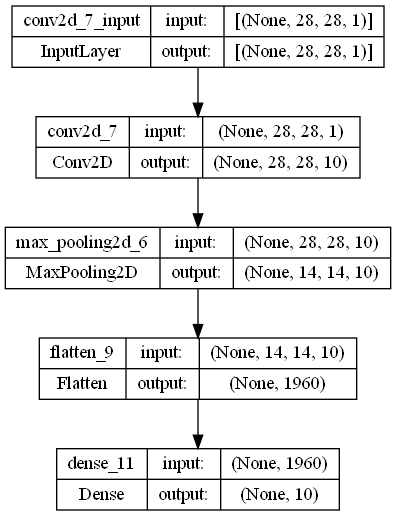

In [140]:
plot_model(model, show_shapes=True)

### [3-2] 모델 생성
- compile메서드
    - 손실 함수 loss : sparse_categorical_crossentropy
    - optimizer : adam
    - metrics : accuracy

In [141]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### [3-3] 모델 학습
- fit 메서드
    - 학습 데이터, 라벨
    - epochs 학습횟수
    - batch_size 학습분량
    - validation_data 검증 데이터, 검증 라벨 (튜플)
    - validation_split 학습 데이터의 일부 비율 설정(예 0.2)
    - callback
    - verbose : 학습 진행도 화면 출력 여부 설정

In [142]:
model.fit(train_input, train_target,epochs=10)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5169 - accuracy: 0.8223
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3831 - accuracy: 0.8671
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3502 - accuracy: 0.8774
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3274 - accuracy: 0.8858
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3093 - accuracy: 0.8918
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2949 - accuracy: 0.8956
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2827 - accuracy: 0.9015
Epoch 8/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2704 - accuracy: 0.9049
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2619 - accuracy: 0.9084
Epoch 10/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.252

In [143]:
model.evaluate(val_input,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2934 - accuracy: 0.8988


[0.293377161026001, 0.8987500071525574]

In [144]:
model.evaluate(test_input,test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.3107 - accuracy: 0.8898


[0.3107122778892517, 0.8898000121116638]

In [155]:
pretest=model.predict(test_input[1].reshape(-1,28,28,1))

1/1 [==============================] - 0s 13ms/step


In [156]:
import matplotlib.pyplot as plt

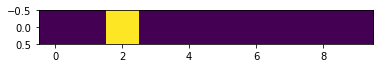

In [157]:
plt.imshow(pretest)

In [158]:
test_target[1]

2

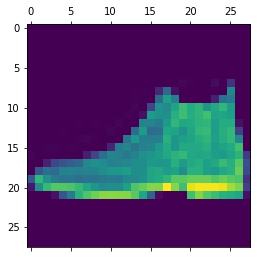

In [161]:
plt.matshow(test_input[0].reshape(28,28))
plt.show()